# Medical Cost Personal

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Importing Data

In [64]:
df_raw=pd.read_csv('insurance.csv')

In [65]:
df=df_raw.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [67]:
df.shape

(1338, 7)

## Data Processing

In [68]:
per_null=(df.isna().sum()/df.shape[0])*100
per_null

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Hypothesis Testing

In [70]:
columns=df.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [71]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['sex', 'smoker', 'region']

In [72]:
for col in not_numeric:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(f"\033[1m Unique :{df[col].nunique()}\n{20 * '-'}\033[0m")
    print(f"{20 * '-'}")
    print(df[col].value_counts(), '\n')

sex 
--------------------
 Unique :2
--------------------
--------------------
male      676
female    662
Name: sex, dtype: int64 

smoker 
--------------------
 Unique :2
--------------------
--------------------
no     1064
yes     274
Name: smoker, dtype: int64 

region 
--------------------
 Unique :4
--------------------
--------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



In [73]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [74]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [75]:
numeric = []
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric.append(label)
numeric

['age', 'bmi', 'children', 'charges']

In [76]:
not_numeric=[]
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric.append(label)
not_numeric

['sex', 'smoker', 'region']

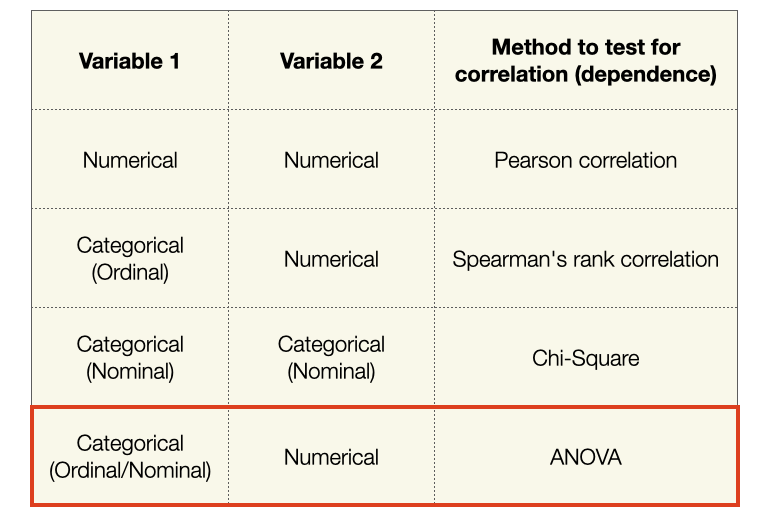

### ANOVA Test

In [77]:
from scipy.stats import f_oneway

In [78]:
def perform_Anova_test_regression(data_frame, list_of_column, Target_column):
    
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Categorical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        # Running the one-way anova test 
        # Assumption(H0) is that variable are NOT correlated

        CategoryGroupLists=data_frame.groupby(col)[Target_column].apply(list)
        #print(CategoryGroupLists)

        # Performing the ANOVA test
        # We accept the Assumption(H0) only when P-Value &gt; 0.05
        AnovaResults = f_oneway(*CategoryGroupLists)
        pvalNum.append(AnovaResults[1])
        #print('P-Value for Anova is: ', AnovaResults[1])
        
    dict={'P-Value of the ChiSq Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the ChiSq Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    return PvalueTable

In [79]:
perform_Anova_test_regression(df,not_numeric,'charges')

,P-Value of the ChiSq Test,Decision
sex,3.613272e-02,Reject Null Hypothesis
smoker,8.271436e-283,Reject Null Hypothesis
region,3.089336e-02,Reject Null Hypothesis


#### As the output of the P-value is less then 0.05, hence, we reject H0. Which means the variables are correlated with each other.

#### This means, if two variables are correlated, then the P-value will come very close to zero.

In [80]:
# pvalNum=[]
# for col in not_numeric:
#     # Running the one-way anova test 
#     # Assumption(H0) is that variable are NOT correlated

#     CategoryGroupLists=df.groupby(col)['charges'].apply(list)
#     #print(CategoryGroupLists)

#     # Performing the ANOVA test
#     # We accept the Assumption(H0) only when P-Value &gt; 0.05
#     AnovaResults = f_oneway(*CategoryGroupLists)
#     pvalNum.append(AnovaResults[1])
#     #print('P-Value for Anova is: ', AnovaResults[1])

# dict={'P-Value of the ChiSq Test':pvalNum}
# PvalueTable=pd.DataFrame(dict,index=not_numeric)
# PvalueTable['Decision']=PvalueTable['P-Value of the ChiSq Test'].apply(lambda row:'Reject Null Hypothesis' 
#                                                                        if row<0.05 else 'Fail to reject Null Hypothesis')
# PvalueTable

### T-Test

In [81]:
numeric

['age', 'bmi', 'children', 'charges']

In [82]:
from scipy.stats import ttest_ind

In [83]:
list_of_numeric_columns=numeric[:-1]

In [84]:
def perform_t_test(data_frame, list_of_column, Target_column):
    '''
    Take the inputs from dataframe and conduct the T-Test fror Numeric Variable and Target Numeric Variable.
    Returns Data frame with P-value and Decision
    
        Parameters:
                data_frame(Data Frame):Pandas Data Farame
                list_of_column: List of Numerical Columns  
                Target_column(str): Target Numeric Label (Regression Value) should be in " " 
        
        Returns:
                PvalueTable(Data Frame): Data frame with P-value and Decision
    '''
    pvalNum=[]
    for col in list_of_column:
        t_statistic, p_value = ttest_ind(df[col], df[Target_column])
        pvalNum.append(p_value)
    
    dict={'P-Value of the T-Test':pvalNum}
    PvalueTable=pd.DataFrame(dict,index=list_of_column)
    PvalueTable['Decision']=PvalueTable['P-Value of the T-Test'].apply(lambda row:'Reject Null Hypothesis' 
                                                                       if row<0.05 
                                                                       else 'Fail to reject Null Hypothesis')
    
    return PvalueTable

In [85]:
perform_t_test(df,list_of_numeric_columns,'charges')

,P-Value of the T-Test,Decision
age,2.937027e-274,Reject Null Hypothesis
bmi,1.538357e-274,Reject Null Hypothesis
children,1.642423e-275,Reject Null Hypothesis


## Multicollinearity Check

**One should always be concerned about the collinearity, regardless of the model/method being linear or not, or the main task being prediction or classification**

### Pearson Correlation

<AxesSubplot:>

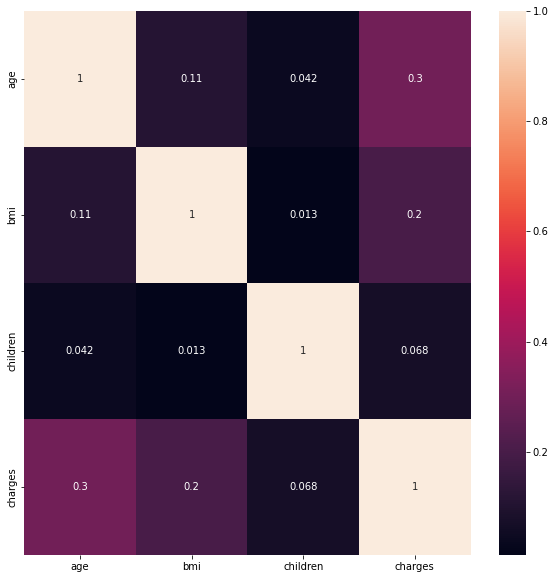

In [86]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method ='pearson'),annot=True)

In [87]:
df_numeric=df[numeric]

In [88]:
df_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


### VIF

In [89]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    '''
    Take the inputs as dataframe and calculate the VIF.
    Returns Data frame with VIF value and respective column name.
    
        Parameters:
                X(Data Frame):Pandas Data Farame
        
        Returns:
                vif(Data Frame): Data frame with VIF value and respective column name.
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [90]:
calc_vif(df_numeric[:-1])

,variables,VIF
0,age,8.096962
1,bmi,8.046283
2,children,1.801469
3,charges,2.470663


#### VIF starts at 1 and has no upper limit
#### VIF = 1, no correlation between the independent variable and the other variables
#### VIF exceeding10 indicates high multicollinearity between this independent variable and the others

#### Generally, a VIF above 4 or tolerance below 0.25 indicates that multicollinearity might exist, and further investigation is required. When VIF is higher than 10 or tolerance is lower than 0.1, there is significant multicollinearity that needs to be corrected.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Multi Colinearity (Another method to check)

In [91]:
def check_muticolinearity(dataframe,threshold = 0.9):
    
    '''
    Take the inputs as dataframe and threshold of correlation.
    Print the number of column and respective column names to be droped.
    
        Parameters:
                dataframe(Data Frame):Pandas Data Farame
        
        Returns:
                Print the number of column and respective column names to be droped.
    
    '''
    corr_matrix =dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    if len(to_drop)>1:
        print(f'There are {len(to_drop)} columns to remove. And they are {to_drop}')
    else:
         print(f'There are {len(to_drop)} columns to remove.')   

In [92]:
check_muticolinearity(df)

There are 0 columns to remove.


## Encoding

In [93]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df['smoker'].unique()

array([1, 0], dtype=int64)

In [94]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['sex'].unique()

array([1, 0], dtype=int64)

In [95]:
df=pd.get_dummies(df,columns =['region'])

## EDA

In [96]:
numeric_new=[]
for label,content in df_raw.items():
    if pd.api.types.is_numeric_dtype(content):
        numeric_new.append(label)
numeric_new

['age', 'bmi', 'children', 'charges']

In [97]:
numericdf=df_raw[numeric_new]

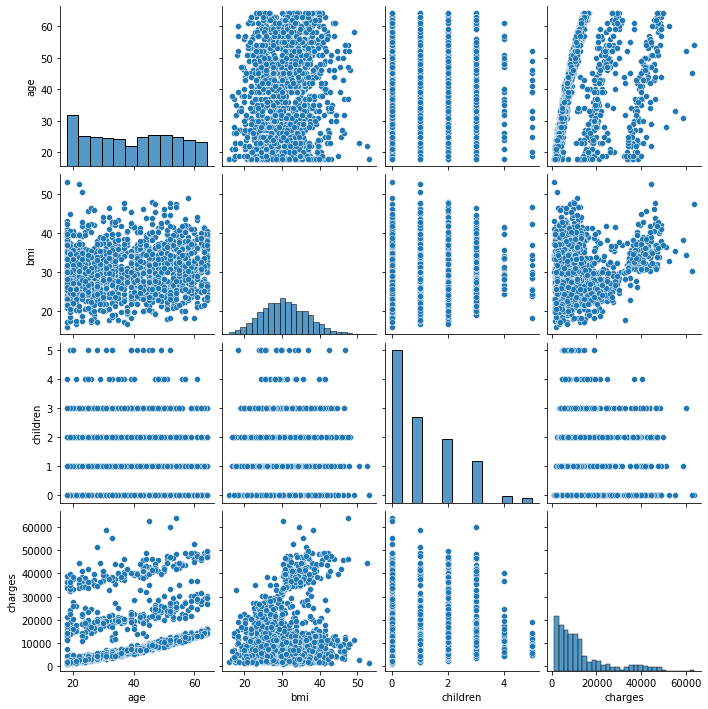

In [98]:
sns.pairplot(numericdf, markers=["o", "s", "D"])

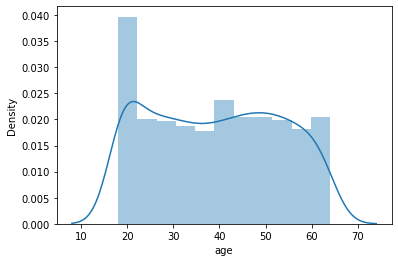

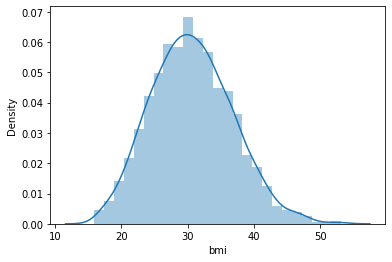

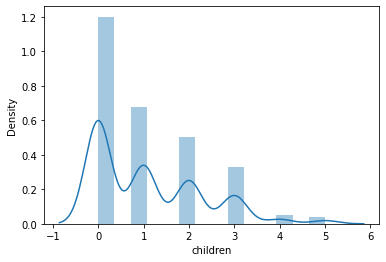

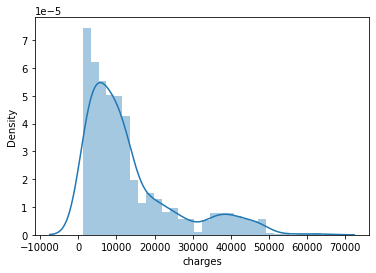

In [99]:
for i in numericdf.columns:
    sns.distplot(numericdf[i])
    plt.show()

In [100]:
not_numeric_new=[]
for label,content in df_raw.items():
    if not pd.api.types.is_numeric_dtype(content):
        not_numeric_new.append(label)
not_numeric_new

['sex', 'smoker', 'region']

In [101]:
nonnumericdf=df_raw[not_numeric_new]
nonnumericdf.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


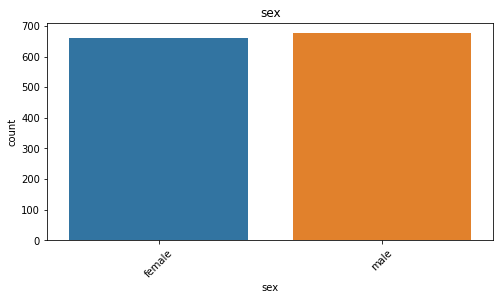

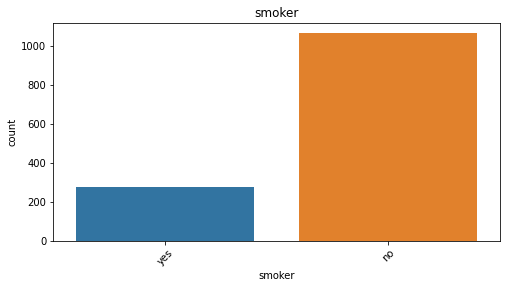

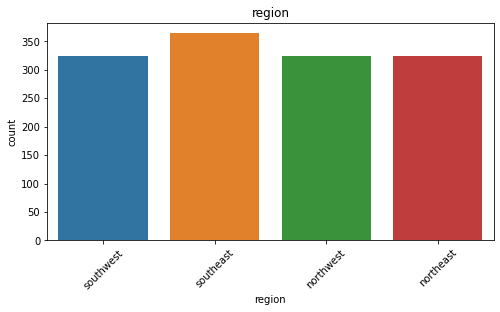

In [102]:
for col in not_numeric_new:
    plt.figure(figsize=(8,4))
    sns.countplot(x=nonnumericdf[col], data=nonnumericdf)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='charges', ylabel='bmi'>

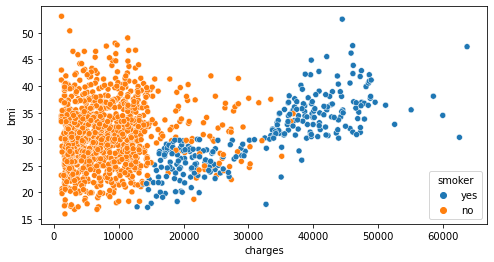

In [103]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_raw['charges'],y=df_raw['bmi'],hue=df_raw['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

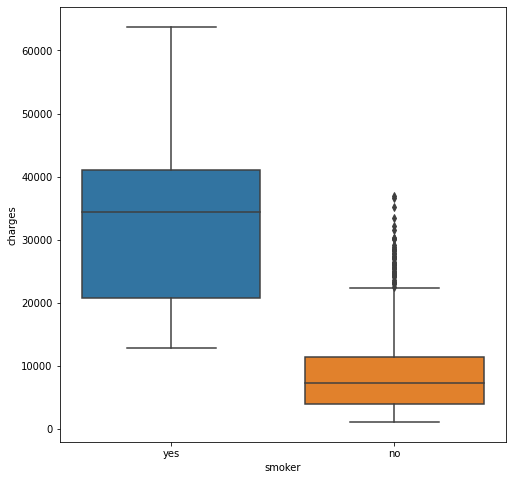

In [104]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_raw,y=df_raw['charges'],x=df_raw['smoker'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

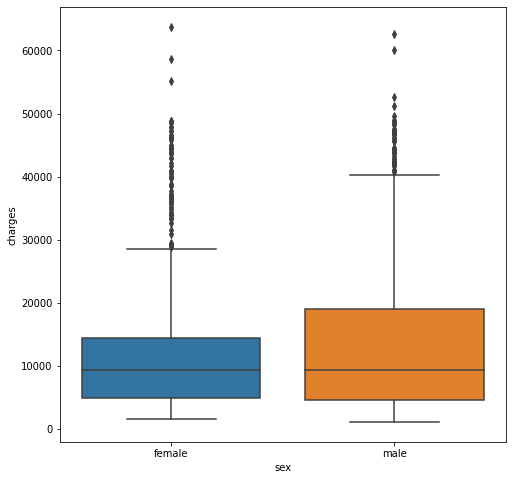

In [105]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_raw,y=df_raw['charges'],x=df_raw['sex'])

<AxesSubplot:xlabel='region', ylabel='charges'>

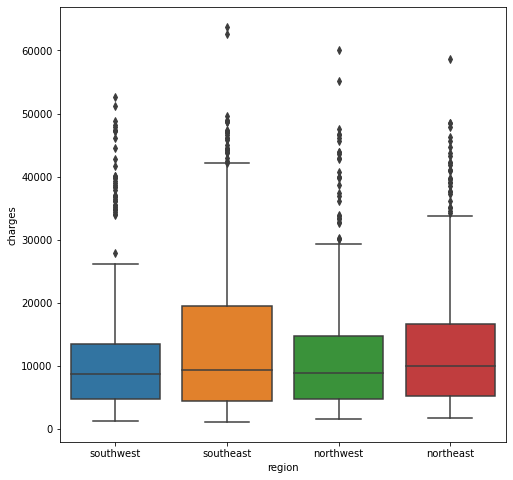

In [106]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_raw,y=df_raw['charges'],x=df_raw['region'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

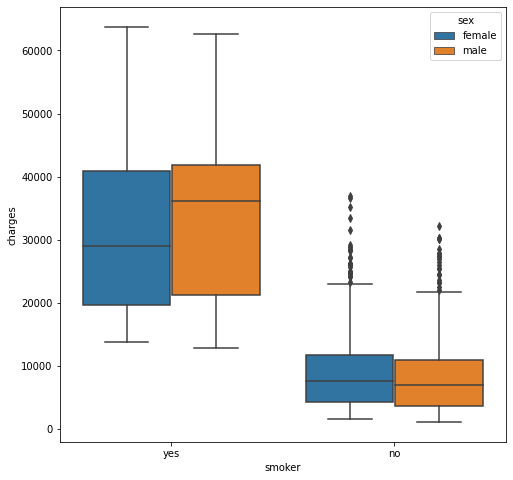

In [107]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_raw,y=df_raw['charges'],x=df_raw['smoker'],hue=df_raw['sex'])

<AxesSubplot:xlabel='region', ylabel='charges'>

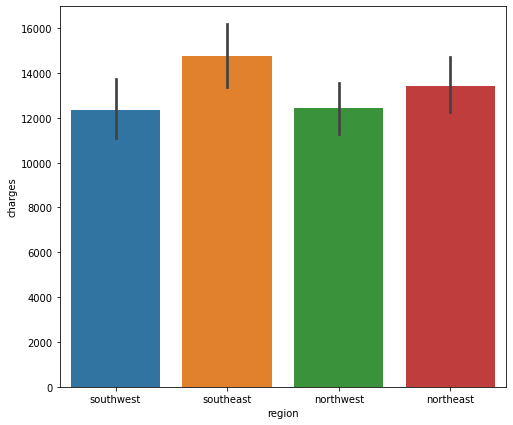

In [108]:
plt.figure(figsize=(8,7))
sns.barplot(data=df_raw,y=df_raw['charges'],x=df_raw['region'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

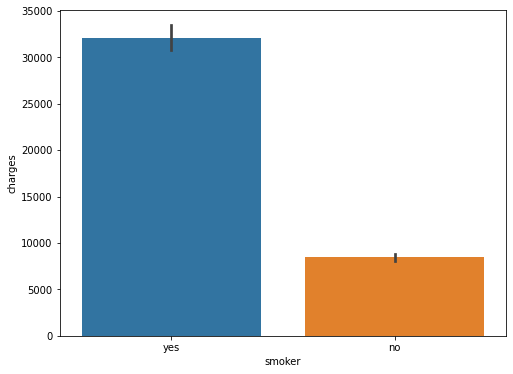

In [109]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_raw,y=df_raw['charges'],x=df_raw['smoker'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

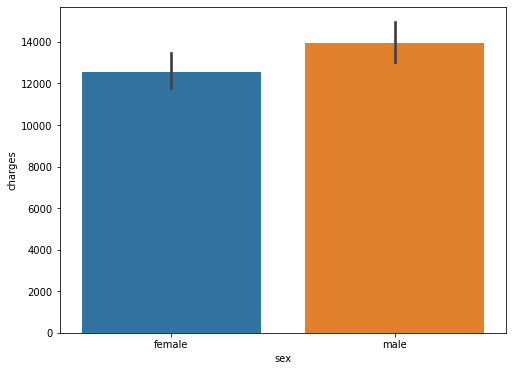

In [110]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_raw,y=df_raw['charges'],x=df_raw['sex'])

## Outlier

In [111]:
from scipy import stats

In [112]:
df.shape

(1338, 10)

In [113]:
df_new=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [114]:
df_new.shape

(1309, 10)

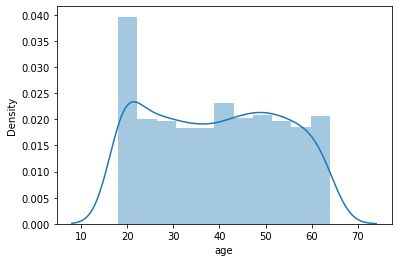

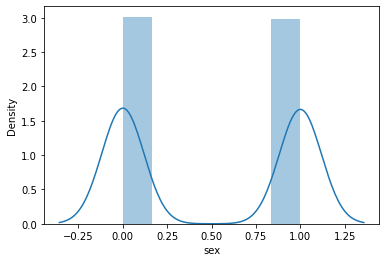

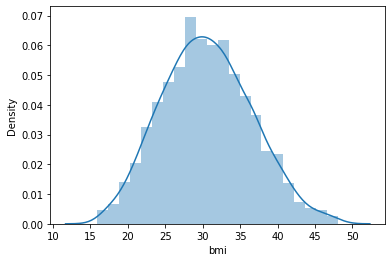

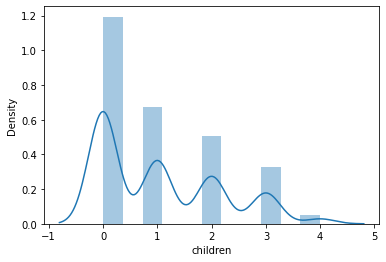

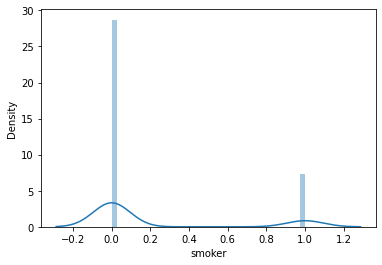

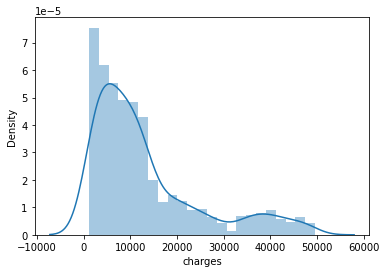

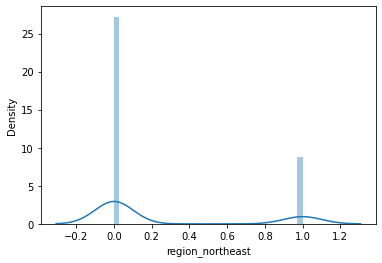

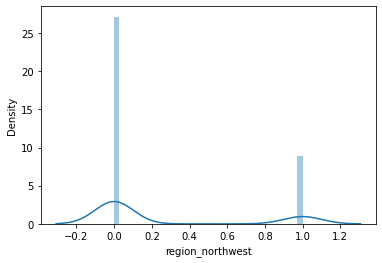

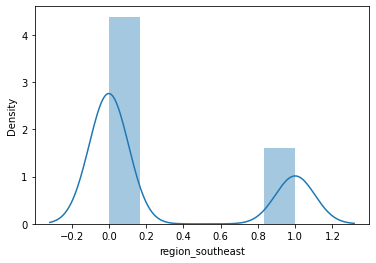

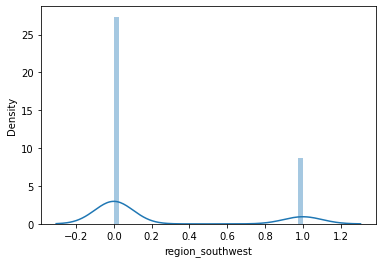

In [115]:
for i in df_new.columns:
    sns.distplot(df_new[i])
    plt.show()

<AxesSubplot:xlabel='charges', ylabel='bmi'>

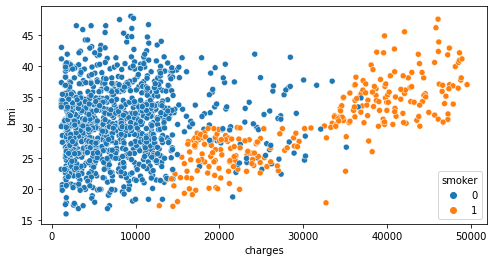

In [116]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_new['charges'],y=df_new['bmi'],hue=df_new['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

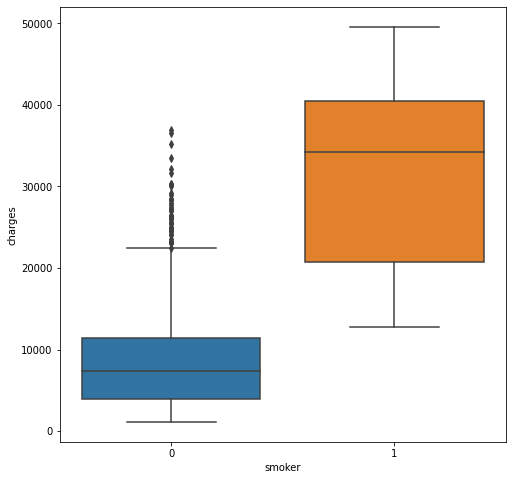

In [117]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df_new,y=df_new['charges'],x=df_new['smoker'])

In [118]:
X=df_new.drop('charges',axis=1)
y=df_new['charges']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
X_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [124]:
X_train.to_pickle("./X_train.pkl")
X_test.to_pickle("./X_test.pkl")
y_train.to_pickle("./y_train.pkl")
y_test.to_pickle("./y_test.pkl")

X.to_pickle("./X.pkl")
y.to_pickle("./y.pkl")
df_new.to_pickle("./df_new.pkl")
df_raw.to_pickle("./df_raw.pkl")

In [125]:
X_train.to_csv("./X_train.csv")
X_test.to_csv("./X_test.csv")
y_train.to_csv("./y_train.csv")
y_test.to_csv("./y_test.csv")

X.to_csv("./X.csv")
y.to_csv("./y.csv")
df_new.to_csv("./df_new.csv")